c:\Users\uriel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
c:\Users\uriel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


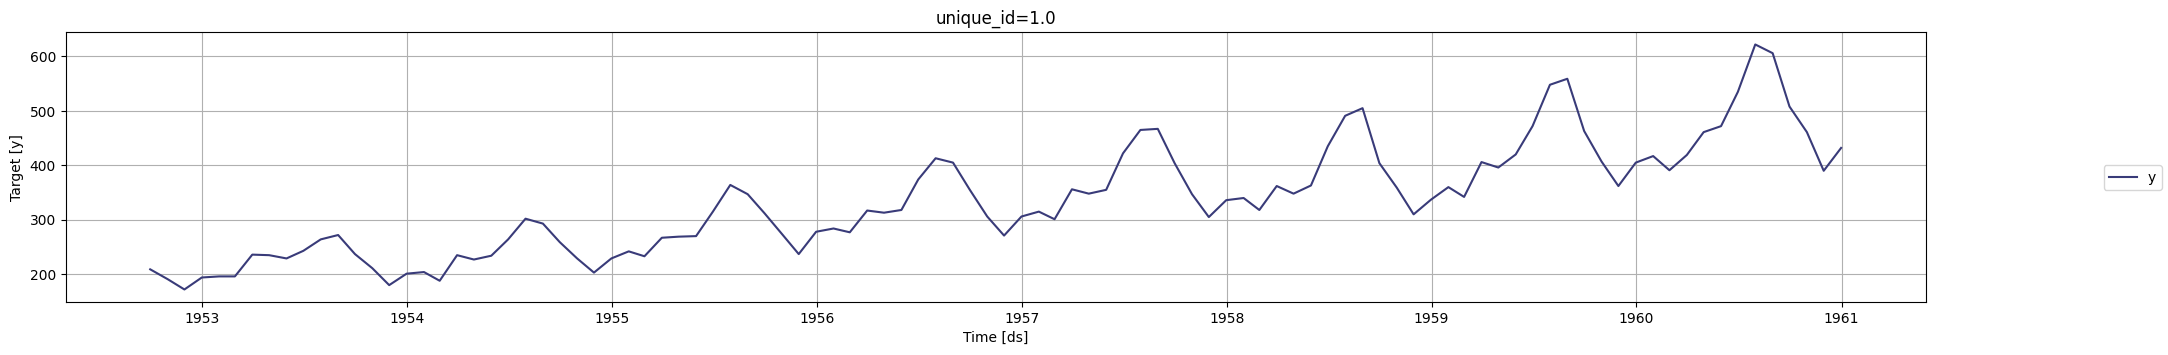

In [1]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.utils import AirPassengersDF
from statsforecast.models import AutoETS
from statsforecast.utils import AirPassengers as ap

df = AirPassengersDF
StatsForecast.plot(df, plot_random = False, max_insample_length = 100)

In [2]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12)],
    freq = 'ME'
)
sf.fit(df)
forecast_df = sf.predict(h=120, level=[90])
print(type(sf)) 

<class 'statsforecast.core.StatsForecast'>


c:\Users\uriel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


c:\Users\uriel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:1325: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


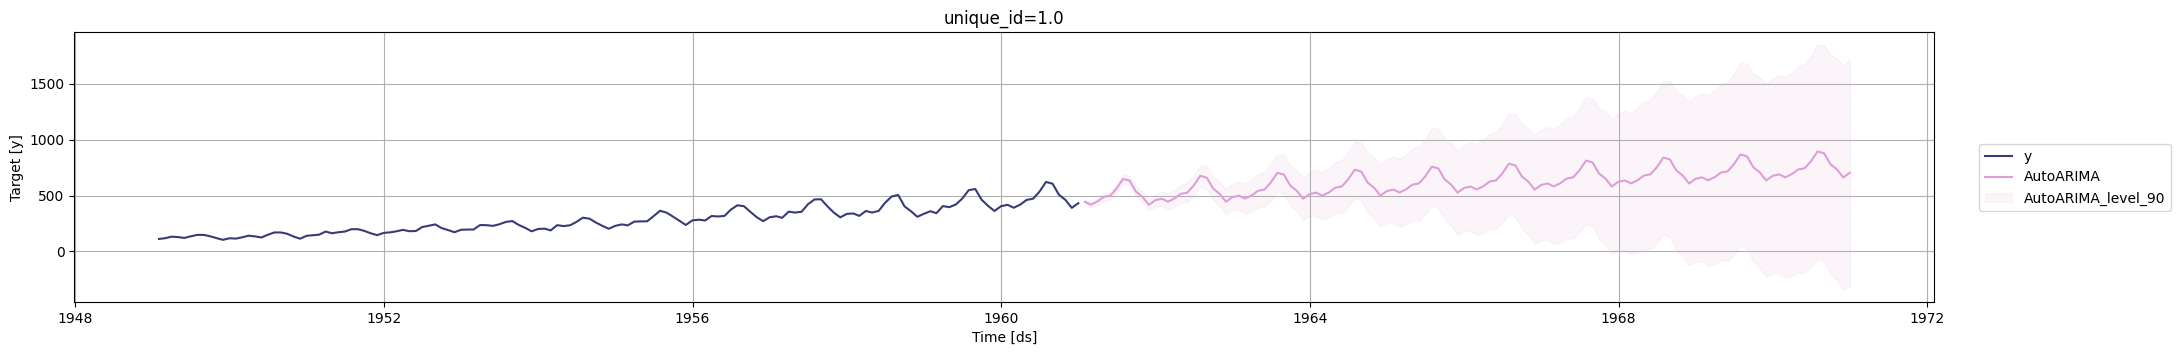

In [3]:
sf.plot(df, forecast_df, level=[90])

In [4]:
# AutoETS' usage example

# Multiplicative trend, optimal error and seasonality
autoets = AutoETS(model='ZMZ',  
              season_length=4)
autoets = autoets.fit(y=ap)
y_hat_dict = autoets.predict(h=12)
y_hat_dict

{'mean': array([416.63294737, 419.65915384, 442.66309931, 457.33314074,
        441.06595156, 444.26962675, 468.62261458, 484.15296528,
        466.93180378, 470.32335515, 496.10449852, 512.54561043])}

In [5]:
sf.plot(df, y_hat_dict)

KeyError: 'ds'